In [155]:
import random
import shutil
import operator
import numpy as np
import pandas as pd 
import os
train_set = pd.read_csv('/Users/yianhuang/Desktop/proj 5/data/google-landmarks-dataset/train.csv')
train_label_to_category = pd.read_csv('/Users/yianhuang/Desktop/proj 5/data/google-landmarks-dataset/train_label_to_category.csv')
train= pd.merge(train_set,train_label_to_category,on="landmark_id")
print("Training data size",train.shape)

Training data size (4132914, 4)


In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

In [157]:
train.head()

,id,url,landmark_id,category
0,6e158a47eb2ca3f6,https://upload.wikimedia.org/wikipedia/commons...,142820,http://commons.wikimedia.org/wiki/Category:Sto...
1,072bd23acd6e0daa,http://upload.wikimedia.org/wikipedia/commons/...,142820,http://commons.wikimedia.org/wiki/Category:Sto...
2,57adb5d4273cb491,https://upload.wikimedia.org/wikipedia/commons...,142820,http://commons.wikimedia.org/wiki/Category:Sto...
3,0dd2ff809608127f,https://upload.wikimedia.org/wikipedia/commons...,142820,http://commons.wikimedia.org/wiki/Category:Sto...
4,1034d5cb0eec963f,https://upload.wikimedia.org/wikipedia/commons...,142820,http://commons.wikimedia.org/wiki/Category:Sto...


In [158]:
temp = 146
print('id', train['id'][temp])
print('url:', train['url'][temp])
print('landmark_id:', train['landmark_id'][temp])
print('category:', train['category'][temp])

id e3515ca415e1dbeb
url: https://upload.wikimedia.org/wikipedia/commons/d/da/Attack_if_you_dare..._-_geograph.org.uk_-_1484089.jpg
landmark_id: 104169
category: http://commons.wikimedia.org/wiki/Category:Stirling_Castle


In [159]:
# missing data in training data 
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending = False)
missing_train_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head()

,Total,Percent
category,0,0.0
landmark_id,0,0.0
url,0,0.0
id,0,0.0


In [160]:
from IPython.display import Image
from IPython.core.display import HTML 

def display_category(urls, category_name):
    img_style = "width: 180px; margin: 0px; float: left; border: 1px solid black;"
    images_list = ''.join([f"<img style='{img_style}' src='{u}' />" for _, u in urls.head(12).iteritems()])

    display(HTML(images_list))

In [161]:
category = train['landmark_id'].value_counts().keys()[0]
urls = train_data[train['landmark_id'] == category]['url']
display_category(urls, "")

In [162]:
# Unique URL's
train.nunique()

id             4132914
url            4132914
landmark_id     203094
category        203094
dtype: int64

In [163]:
# Extract site_names for train data
temp_list = list()
for path in train['category']:
    temp_list.append(path.split(':', 2)[2])
train['name'] = temp_list

In [164]:
train.head(6)

,id,url,landmark_id,category,name
0,6e158a47eb2ca3f6,https://upload.wikimedia.org/wikipedia/commons...,142820,http://commons.wikimedia.org/wiki/Category:Sto...,Stockholms_gamla_observatorium
1,072bd23acd6e0daa,http://upload.wikimedia.org/wikipedia/commons/...,142820,http://commons.wikimedia.org/wiki/Category:Sto...,Stockholms_gamla_observatorium
2,57adb5d4273cb491,https://upload.wikimedia.org/wikipedia/commons...,142820,http://commons.wikimedia.org/wiki/Category:Sto...,Stockholms_gamla_observatorium
3,0dd2ff809608127f,https://upload.wikimedia.org/wikipedia/commons...,142820,http://commons.wikimedia.org/wiki/Category:Sto...,Stockholms_gamla_observatorium
4,1034d5cb0eec963f,https://upload.wikimedia.org/wikipedia/commons...,142820,http://commons.wikimedia.org/wiki/Category:Sto...,Stockholms_gamla_observatorium
5,5655310d1a036ee4,http://upload.wikimedia.org/wikipedia/commons/...,142820,http://commons.wikimedia.org/wiki/Category:Sto...,Stockholms_gamla_observatorium


In [165]:
train.nunique()

id             4132914
url            4132914
landmark_id     203094
category        203094
name            203094
dtype: int64

In [166]:
# Occurance of landmark_id in decreasing order(Top categories)
temp = pd.DataFrame(train.landmark_id.value_counts().head(10))
temp.reset_index(inplace=True)
temp.columns = ['landmark_id','count']


Percentage of the 10 most frequent landmarks in : total 4132914 ids 17.213703999133408 %


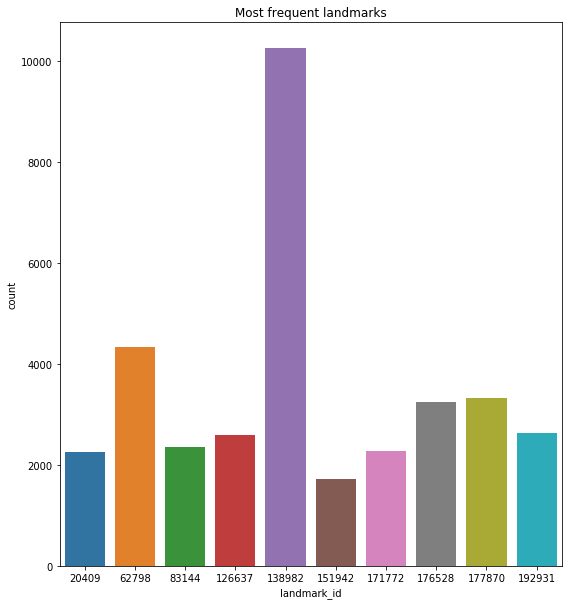

In [167]:
print("Percentage of the 10 most frequent landmarks in : total 4132914 ids",sum(temp['count'])/203094*100,"%")
# Plot the most frequent landmark_ids
plt.figure(figsize = (9, 10))
plt.title('Most frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=temp,
            label="Count")
plt.show()

In [168]:
# Occurance of landmark_id in increasing order
freq = pd.DataFrame(train.landmark_id.value_counts())
freq.reset_index(inplace=True)
freq.columns = ['landmark_id','count']
freq.nunique()

landmark_id    203094
count             655
dtype: int64

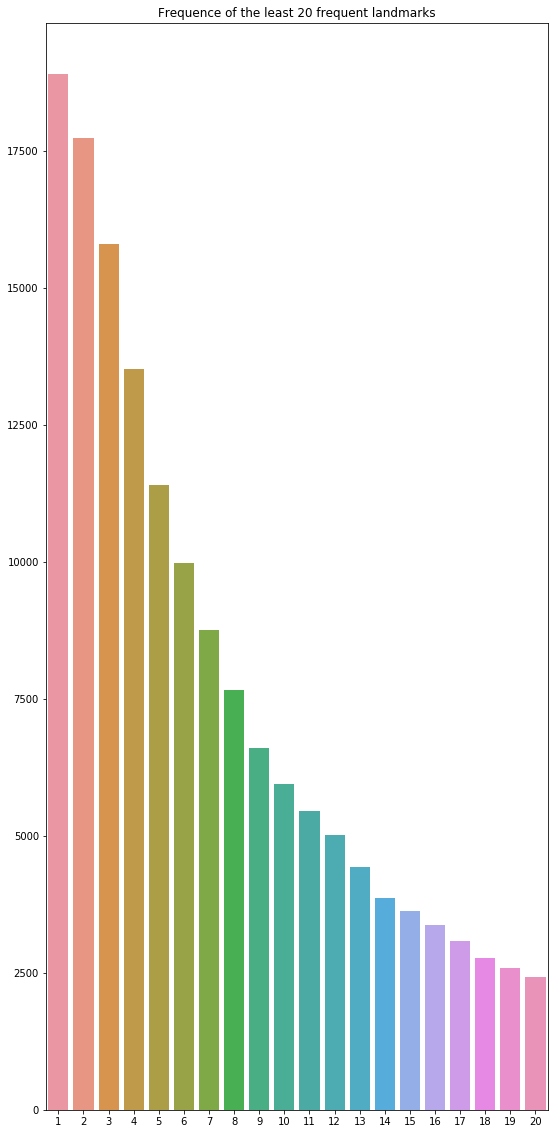

Number of classes under 20 occurences 152925 out of total number of categories 203094


In [169]:
bottomlist=list()
for n in range(20):    
   bottomlist.append(len(freq.loc[freq['count'] ==n+1 ]))
count=list(range(1,21))
plt.figure(figsize = (9, 20))
plt.title('Frequence of the least 20 frequent landmarks')
sns.set_color_codes("pastel")

sns.barplot(x=count, y=bottomlist)
plt.show()

#Percentage of the least 20 frequent landmarks
print("Number of classes under 20 occurences",(train['landmark_id'].value_counts() <= 20).sum(),'out of total number of categories',len(train['landmark_id'].unique()))

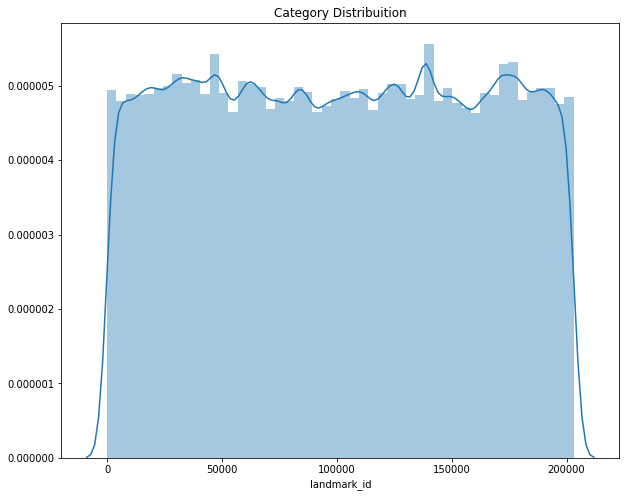

In [170]:
#Show the Distribution of Caregories
plt.figure(figsize = (10, 8))
plt.title('Category Distribuition')
sns.distplot(train['landmark_id'])
plt.show()